In [9]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = loadmat('data/faces.mat')
data = data['X']
print(data.shape)
data

(5000, 1024)


array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
        -111.86631387,  -99.86631387],
       [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
          -8.86631387,    0.13368613],
       [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
        -111.86631387, -111.86631387],
       ...,
       [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
          80.13368613,   59.13368613],
       [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
         -41.86631387,  -46.86631387],
       [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
          17.13368613,   18.13368613]])

In [8]:
np.mean(data[0])

-20.3995169921875

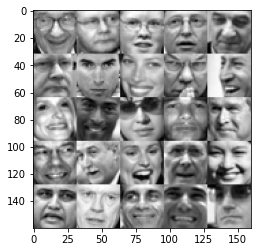

In [20]:
def reshape_image(data, index, width, height, out, x, y):
    offset_x = 0
    offset_y = 0
    
    row = data[index]
    row = (row - np.min(row)) / (np.max(row) - np.min(row))
    
    for value in row:
        out[x + offset_x, y + offset_y] = [value, value, value]
        offset_x = offset_x + 1
        offset_y = offset_y + (offset_x // width)
        offset_x = offset_x % width
        
def draw_image_grid(data, grid_width, grid_height, image_width, image_height):
    out = np.zeros((grid_width * image_width, grid_height * image_height, 3))
    for x in range(0, grid_width):
        for y in range(0, grid_height):
            reshape_image(data, x * grid_width + y, image_width, image_height, out, x * image_width, y * image_height)
    plt.imshow(out)
        
draw_image_grid(data, 5, 5, 32, 32)


In [21]:
m = data.shape[0]
n = data.shape[1]

Sigma = np.matmul(data.T, data) / m
Sigma

array([[3089.38271757, 2970.80703283, 2771.83655495, ...,  685.05128843,
         748.97792288,  784.47840946],
       [2970.80703283, 2968.9355481 , 2833.96527022, ...,  660.3822037 ,
         724.06043815,  757.17872472],
       [2771.83655495, 2833.96527022, 2835.08259233, ...,  624.69692582,
         689.59456027,  723.61744684],
       ...,
       [ 685.05128843,  660.3822037 ,  624.69692582, ..., 3857.4118593 ,
        3863.04609375, 3723.99638032],
       [ 748.97792288,  724.06043815,  689.59456027, ..., 3863.04609375,
        4099.3171282 , 4078.18741477],
       [ 784.47840946,  757.17872472,  723.61744684, ..., 3723.99638032,
        4078.18741477, 4280.30550135]])

In [22]:
U, S, V = np.linalg.svd(Sigma)

In [23]:
U

array([[-0.01640988, -0.04222849, -0.0421747 , ...,  0.00078787,
         0.00059301,  0.00069988],
       [-0.01692408, -0.04109658, -0.04413594, ..., -0.0014743 ,
        -0.00159743, -0.00183183],
       [-0.01714767, -0.03963341, -0.04577663, ...,  0.00796443,
         0.00053733,  0.00152458],
       ...,
       [-0.0085838 , -0.05826306,  0.04851035, ..., -0.00294466,
         0.00394326,  0.00497121],
       [-0.00680308, -0.06081527,  0.04664601, ...,  0.00038729,
        -0.00186067, -0.00185365],
       [-0.005765  , -0.06173977,  0.04483153, ...,  0.00228049,
         0.00058499,  0.00071138]])

In [24]:
S

array([5.13628405e+05, 3.64912274e+05, 2.30731273e+05, ...,
       3.45585544e-01, 3.26124510e-01, 3.14979057e-01])

In [25]:
decision = []
S_sum = np.sum(S)
for s in S:
    if len(decision) == 0:
        decision.append(s / S_sum)
    else:
        decision.append(decision[-1] + (s / S_sum))        
decision

[0.25604443757229084,
 0.43795368734152085,
 0.5529735314575753,
 0.6049091941663243,
 0.6365198646691465,
 0.6644056708234034,
 0.6827486333752432,
 0.6982407474167474,
 0.711651163368769,
 0.7248279338953743,
 0.73556927002514,
 0.7462322725535271,
 0.7557592225014353,
 0.7633232653314783,
 0.7702680455262956,
 0.7767304522443407,
 0.7831260963798679,
 0.7888560254052523,
 0.7945299217135984,
 0.7997071139590873,
 0.8043451372052376,
 0.8089403272836747,
 0.8134721524229755,
 0.8177692043085185,
 0.8219162635925554,
 0.8259458255377797,
 0.8298483515605001,
 0.8335320911511027,
 0.837082376969908,
 0.8406202663778587,
 0.8439316210249683,
 0.8471966175108157,
 0.8503298301007094,
 0.8533942252236113,
 0.856315115648008,
 0.8590715310088946,
 0.861783126898389,
 0.8643384344643781,
 0.8668656888443471,
 0.8692937321172225,
 0.8716254998177616,
 0.8739445794139737,
 0.8761907895285873,
 0.8783650636946986,
 0.8804599426796266,
 0.8825086888656501,
 0.8845169283422325,
 0.88643174721261

In [43]:
k = 32
print(decision[k - 1])

0.8471966175108157


In [44]:
u = U[:, 0:k].reshape(n, k)
u

array([[-0.01640988, -0.04222849, -0.0421747 , ..., -0.06554939,
         0.00835682, -0.02287137],
       [-0.01692408, -0.04109658, -0.04413594, ..., -0.06106007,
         0.00589888, -0.01975111],
       [-0.01714767, -0.03963341, -0.04577663, ..., -0.05214399,
        -0.00046836, -0.01799836],
       ...,
       [-0.0085838 , -0.05826306,  0.04851035, ..., -0.00820376,
        -0.00786119, -0.0020667 ],
       [-0.00680308, -0.06081527,  0.04664601, ..., -0.00208879,
        -0.0073587 , -0.01029257],
       [-0.005765  , -0.06173977,  0.04483153, ..., -0.00084695,
        -0.01022747, -0.01420365]])

In [45]:
data_reduced = np.matmul(data, u)
data_reduced

array([[ 526.09608833,  734.37008142,  194.48322788, ...,   46.95092211,
          27.19564668, -159.04976012],
       [ 304.5906028 ,  493.0633805 , -162.10424193, ...,   57.96157916,
          -6.0086339 ,  -62.81637412],
       [-389.99893833,  600.20010851, -293.91694459, ...,    4.80546462,
         -52.97123186,  -75.1108242 ],
       ...,
       [ 487.55926046,  430.86037345,  490.71749378, ...,  -68.78208257,
        -150.86541285,  142.83862917],
       [1358.99575656,  402.85437502, -136.10305216, ...,  -52.98555664,
         -68.30422631,  -12.42485378],
       [ 372.01599145,  360.59923883,  105.10564415, ...,   22.83703575,
         -23.93075696,   57.27254291]])

In [46]:
data_recovered = np.matmul(data_reduced, u.T)
data_recovered

array([[ -39.76620313,  -38.61655641,  -37.24143047, ...,  -56.82519311,
         -54.19672742,  -51.16784611],
       [ -15.22064593,  -15.06177081,  -14.91804952, ...,  -49.30389252,
         -48.13572247,  -46.38039267],
       [  -7.20440839,   -8.48691996,   -7.79941287, ...,  -86.46504492,
         -89.79495266,  -90.86360822],
       ...,
       [ -40.8702623 ,  -39.0716437 ,  -34.7616551 , ...,   75.90008993,
          75.74677212,   72.56938735],
       [  13.17139168,   15.97664193,   18.04195306, ...,  -55.08048178,
         -55.40320005,  -54.28527162],
       [-107.61389349, -108.98205665, -109.1207399 , ...,    8.15987143,
           8.18181115,    7.36281001]])

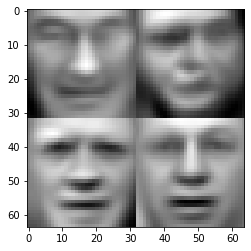

In [47]:
draw_image_grid(data_recovered, 2, 2, 32, 32)